In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-01-18 19:00:37.746190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.13.1


### Part 1: Read in the data

In [7]:
path='ML/'

In [8]:
df=pd.read_csv(path+'creditcard.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.groupby('Class')['Time'].count()

Class
0    284315
1       492
Name: Time, dtype: int64

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape

(284807, 31)

### Part 2: Check data quality

In [13]:
# check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* No null values

In [14]:
# observations in each class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

##### We want to see whether any predictors (independent variables) can already predict the outcome perfectly

In [15]:
df.drop('Class', axis=1).columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### Part 3: Distribution examination
* If you see two clases has a clear separation by one of two varibles, we proabaly do not need to build a model.
* We can write some business rules to segment out these clusters. 

In [16]:
df_fraud=df[df['Class']==1]
df_nonfraudsamp=df[df['Class']==0].sample(492)

df2=pd.concat([df_fraud, df_nonfraudsamp])
df2['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

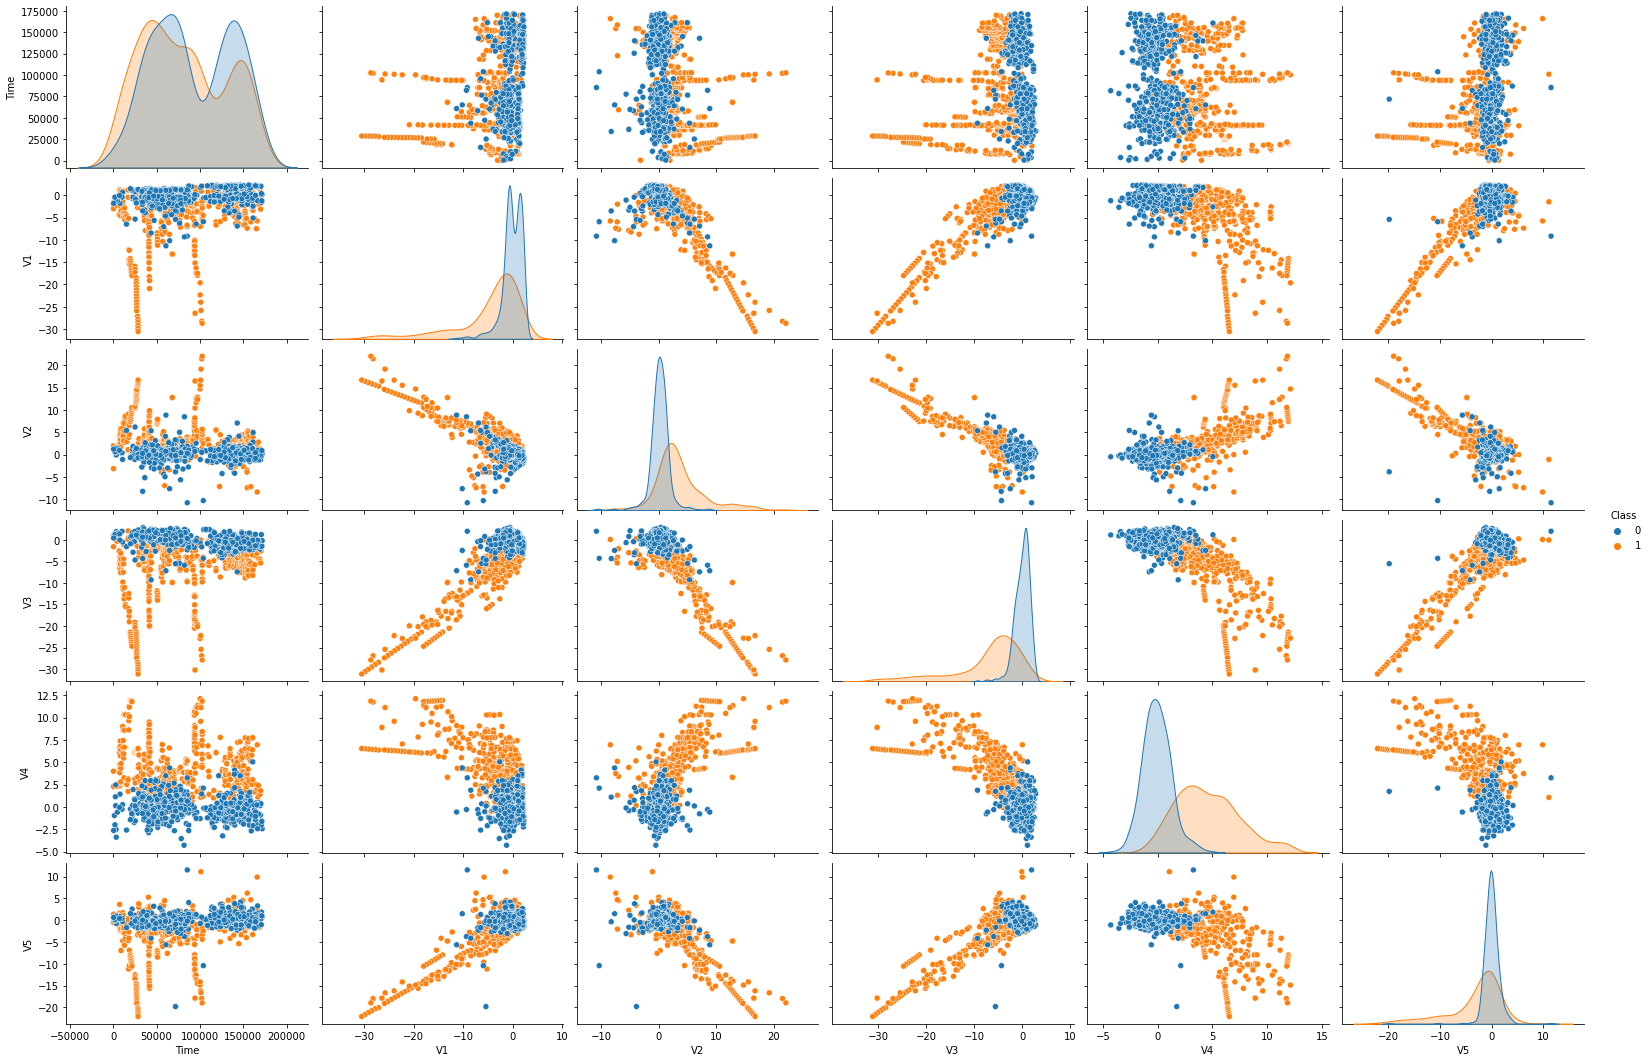

In [17]:
sns.pairplot(df2[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'Class']], hue='Class', aspect=1.5)

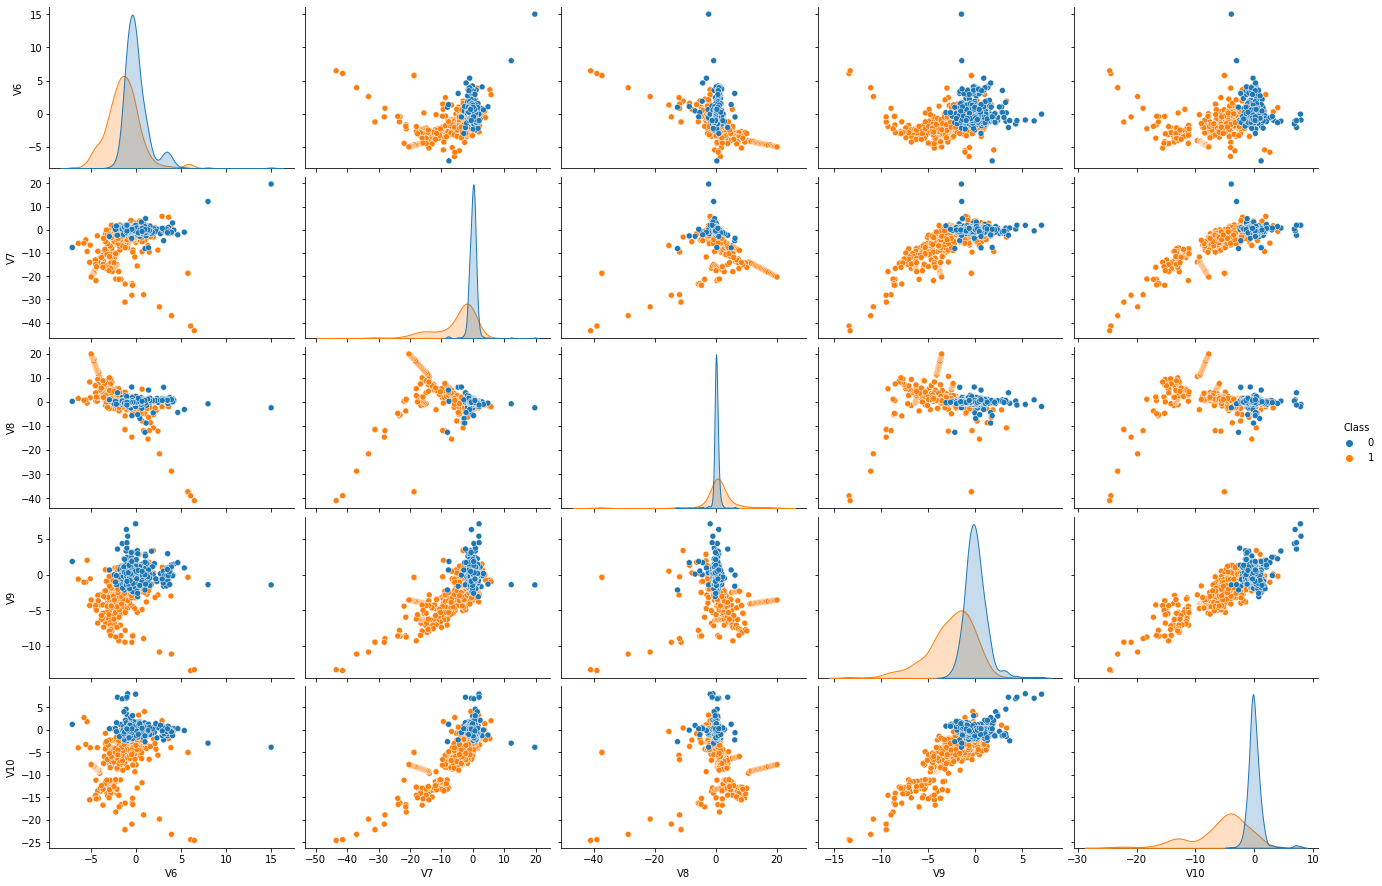

In [18]:
sns.pairplot(df2[['V6', 'V7', 'V8', 'V9', 'V10', 'Class']], hue='Class', aspect=1.5)

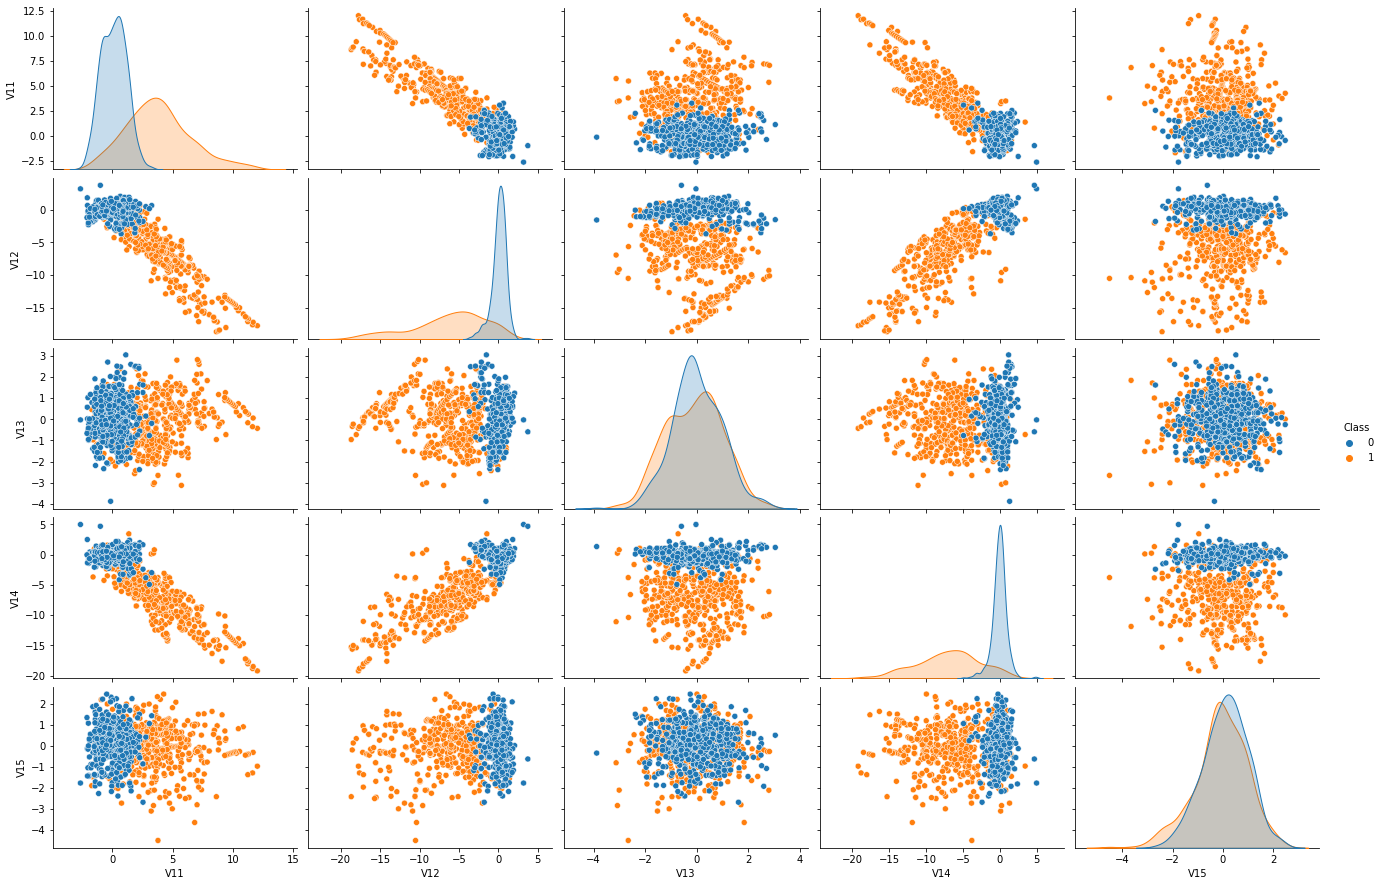

In [19]:
sns.pairplot(df2[['V11', 'V12', 'V13', 'V14', 'V15', 'Class']], hue='Class', aspect=1.5)

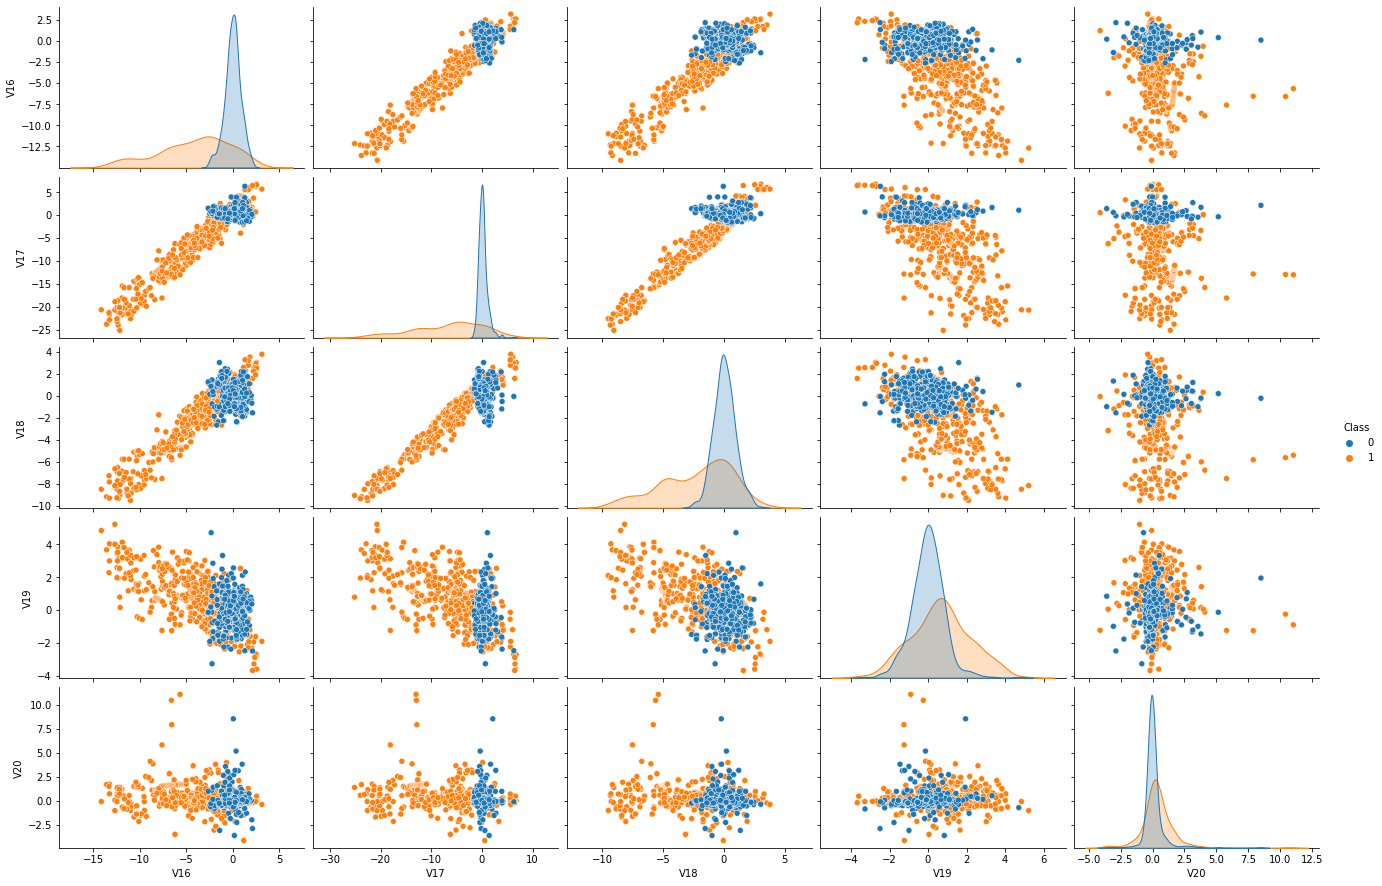

In [20]:
sns.pairplot(df2[['V16', 'V17', 'V18', 'V19', 'V20', 'Class']], hue='Class', aspect=1.5)

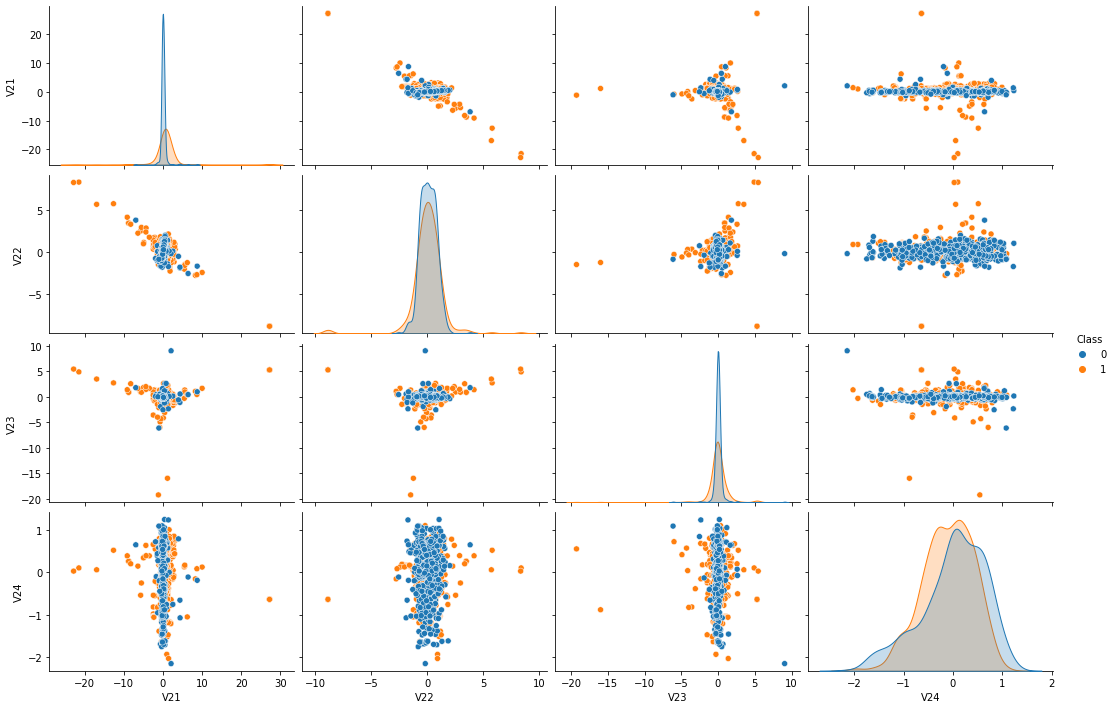

In [21]:
sns.pairplot(df2[['V21', 'V22', 'V23', 'V24', 'Class']], hue='Class', aspect=1.5)

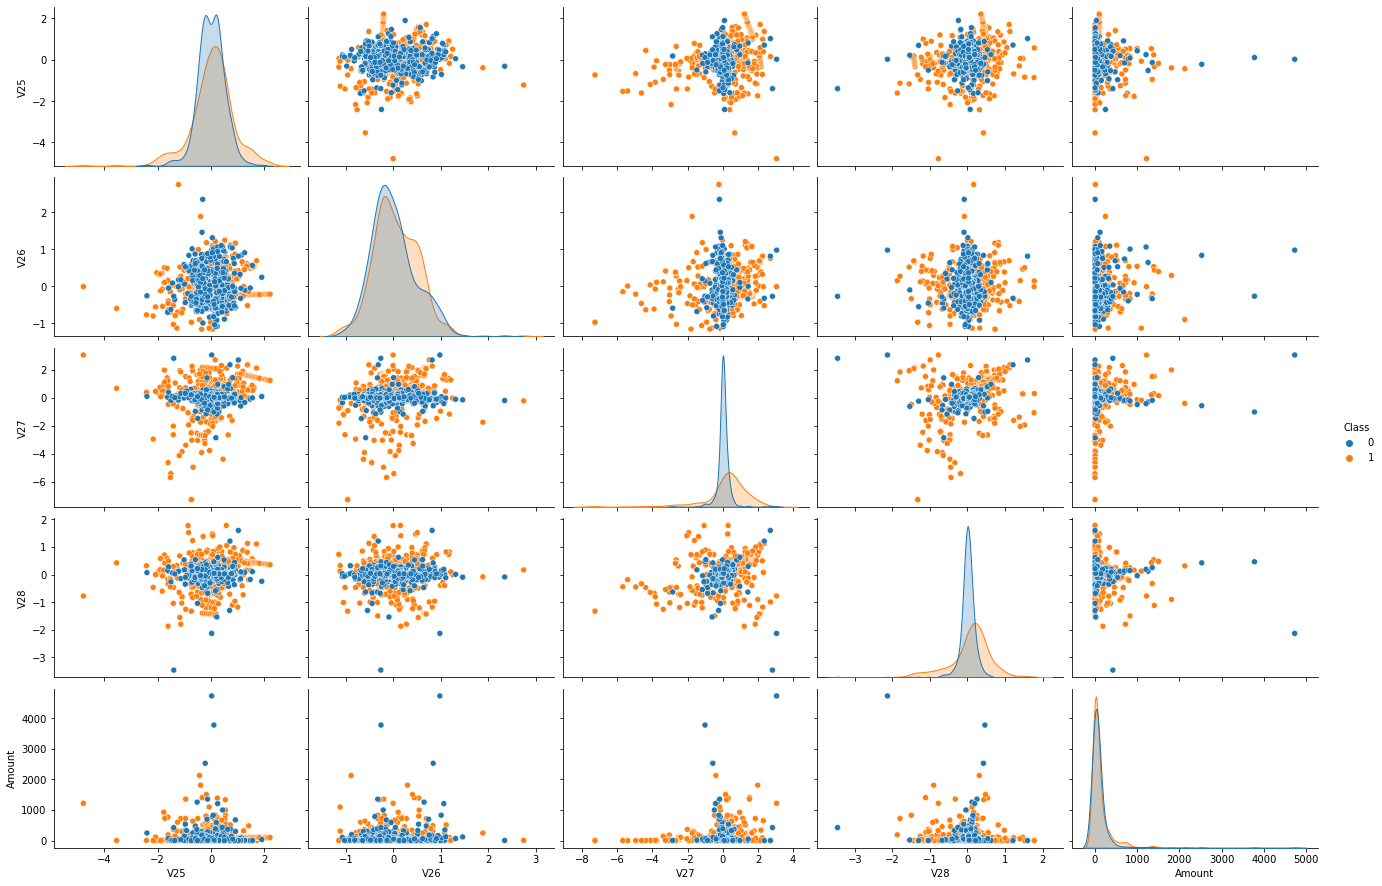

In [22]:
sns.pairplot(df2[['V25', 'V26', 'V27', 'V28', 'Amount', 'Class']], hue='Class', aspect=1.5)

In [23]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

<AxesSubplot:title={'center':'Correlation with Interest Rate'}>

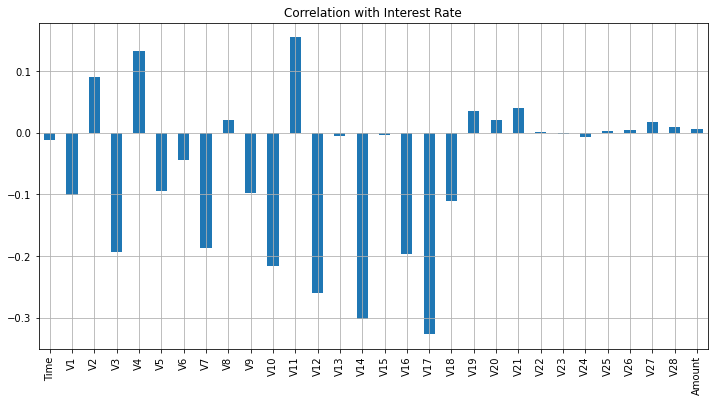

In [24]:
df.drop('Class', axis=1).corrwith(df['Class']).plot.bar(figsize=(12,6), title='Correlation with Interest Rate', grid=True)

<AxesSubplot:>

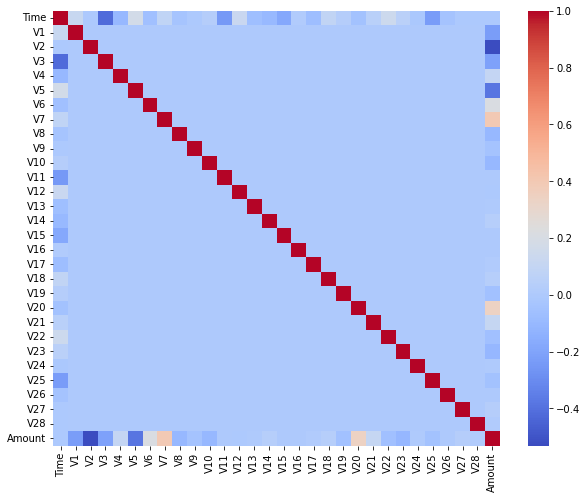

In [25]:
fig=plt.figure(figsize=(10, 8))

sns.heatmap(df.drop('Class', axis=1).corr(), cmap="coolwarm")

<AxesSubplot:>

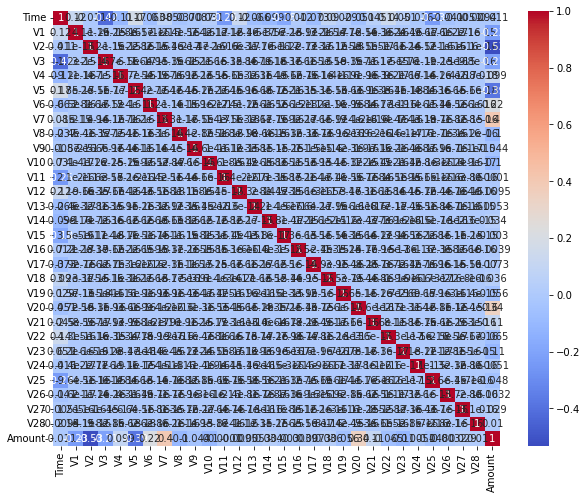

In [26]:
fig=plt.figure(figsize=(10, 8))

sns.heatmap(df.drop('Class', axis=1).corr(), cmap="coolwarm", annot=True)

### Part 4: Artificial Neural Network (ANN) model

In [27]:
x=df.drop('Class', axis=1)
y=df['Class']

In [28]:
x.shape, y.shape

((284807, 30), (284807,))

In [29]:
# split the sample into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
x_train.shape, x_test.shape

((227845, 30), (56962, 30))

#### 4.1: Set up ANN model

In [31]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
x_train

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

In [33]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [34]:
x_train.shape, x_test.shape

((227845, 30), (56962, 30))

In [35]:
# reshape the dataset
x_train=x_train.reshape(227845, 30, 1)
x_test=x_test.reshape(56962, 30, 1)

In [36]:
x_train.shape, x_test.shape

((227845, 30, 1), (56962, 30, 1))

In [37]:
### Part 3: Artificial Neural Network (ANN)
#### Part 3.1: set up the ANN model structure

In [38]:
model=tf.keras.models.Sequential()

# set up initial input layer
model.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=30))

# add 2nd hidden layer
model.add(tf.keras.layers.Dense(units=10, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431 (1.68 KB)
Trainable params: 431 (1.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 4.2: Run ANN model

In [39]:
model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
22785/22785 [==============================] - 22s 947us/step - loss: 0.0096 - accuracy: 0.9980
Epoch 2/20
22785/22785 [==============================] - 22s 974us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 3/20
22785/22785 [==============================] - 22s 964us/step - loss: 0.0032 - accuracy: 0.9993
Epoch 4/20
22785/22785 [==============================] - 24s 1ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 5/20
22785/22785 [==============================] - 24s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 6/20
22785/22785 [==============================] - 26s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 7/20
22785/22785 [==============================] - 26s 1ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 8/20
22785/22785 [==============================] - 25s 1ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 9/20
22785/22785 [==============================] - 25s 1ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 10/20
22785/22785 [========================

In [40]:
# evaluate the model
test_loss, test_acc=model.evaluate(x_test, y_test)

1781/1781 [==============================] - 2s 937us/step - loss: 0.0030 - accuracy: 0.9995


In [41]:
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.9994733333587646


In [42]:
# The following only works for tensorflow 2.6 or later.
# for earlier version of tensorflow 2.0, use predict_classes(x_test)
y_pred=model.predict(x_test)
classes_y=np.argmax(y_pred, axis=1)

1781/1781 [==============================] - 1s 767us/step


In [43]:
y_pred

array([[6.4317457e-05],
       [8.8734278e-06],
       [4.6572954e-06],
       ...,
       [5.8223790e-08],
       [2.3803168e-06],
       [1.0223071e-06]], dtype=float32)

In [44]:
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.columns=['y_pred']

In [45]:
y_test_df=pd.DataFrame(y_test)
y_test_df.columns=['y']

In [46]:
y_test_df['y_pred']=y_pred_df

In [47]:
num_bins=100

binlabels=list(range(0, num_bins))

y_test_df['score_cut']=pd.qcut(y_test_df['y_pred'], q=num_bins, labels=binlabels)

/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score_cut', ylabel='y'>

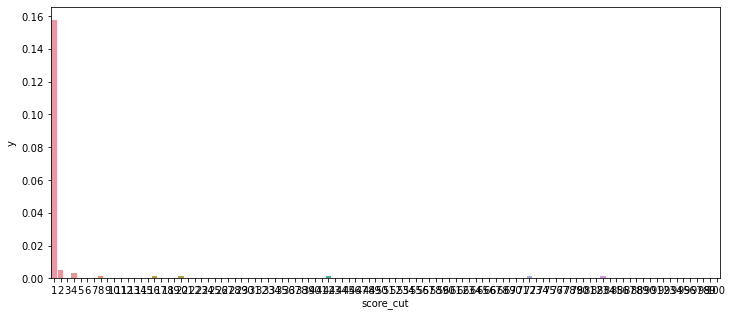

In [48]:
fig=plt.figure(figsize=(12, 5))

y_test_df_sum=y_test_df.groupby('score_cut')[['y_pred', 'y']].mean().reset_index()
y_test_df_sum['score_cut']=y_test_df_sum['score_cut'].astype(int)
y_test_df_sum['score_cut']=num_bins-y_test_df_sum['score_cut']

sns.barplot(y_test_df_sum['score_cut'], y_test_df_sum['y'])

Text(0, 0.5, 'Predicted/Actual')

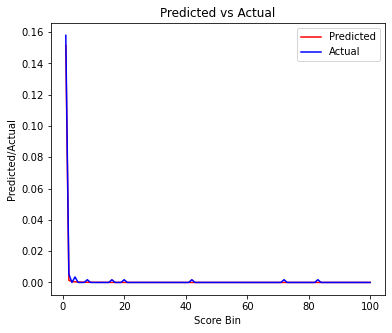

In [49]:
fig, ax=plt.subplots(1, 1, figsize=(6, 5))

ax.plot(y_test_df_sum['score_cut'], y_test_df_sum['y_pred'], label='Predicted', color='red')
ax.plot(y_test_df_sum['score_cut'], y_test_df_sum['y'], label='Actual', color='blue')
ax.set_title('Predicted vs Actual')
ax.legend(loc='upper right')
ax.set_xlabel('Score Bin')
ax.set_ylabel('Predicted/Actual')

### Part 5: Convoluted Neural Network (CNN) Model
#### Part 3.1: Set up the CNN model structure

In [50]:
# define an object for the model
model=tf.keras.models.Sequential()

In [51]:
# 1st CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)))

# batch normalization 
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# 2nd CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization 
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [52]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [53]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [54]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 30, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 15, 64)           

In [56]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [57]:
# compile the CNN model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#### Part 3.2: Run the CNN model

In [58]:
history=model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0131 - accuracy: 0.9983 - val_loss: 0.0078 - val_accuracy: 0.9992
Epoch 2/25
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 3/25
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 4/25
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 5/25
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 6/25
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 7/25
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0034 - val_ac

In [59]:
# model predictions
y_pred=model.predict(x_test)
classes_y=np.argmax(y_pred, axis=1)

1781/1781 [==============================] - 2s 1ms/step


In [60]:
type(y_pred)

numpy.ndarray

In [61]:
print(y_pred[0], classes_y[0], y_test[0])

[0.0008014] 0 0


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, classes_y)
print(cm)

[[56861     0]
 [  101     0]]


In [63]:
acc_cm=accuracy_score(y_test, classes_y)
print(acc_cm)

0.9982268881008391


In [64]:
# Learning curve
def learning_curve(history, epoch):
    # training vs validation accuracy
    epoch_range=range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()
    

    # training vs validation loss
    epoch_range=range(1, epoch+1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('LOss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()

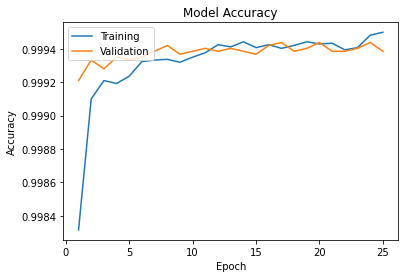

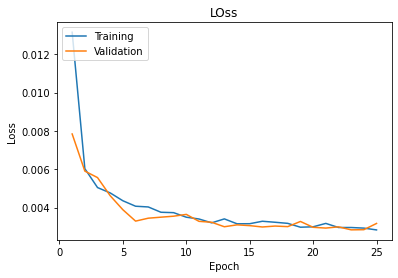

In [65]:
learning_curve(history, 25)

In [66]:
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.columns=['y_pred']

In [67]:
y_test_df=pd.DataFrame(y_test)
y_test_df.columns=['y']

In [68]:
y_test_df['y_pred']=y_pred_df

In [69]:
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       56962 non-null  int64  
 1   y_pred  56962 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 667.6 KB


In [70]:
num_bins=100

binlabels=list(range(0, num_bins))

y_test_df['score_cut']=pd.qcut(y_test_df['y_pred'], q=num_bins, labels=binlabels)

/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score_cut', ylabel='y'>

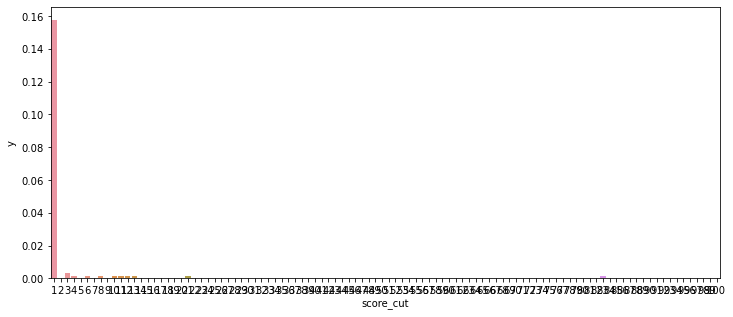

In [71]:
fig=plt.figure(figsize=(12, 5))

y_test_df_sum=y_test_df.groupby('score_cut')[['y_pred', 'y']].mean().reset_index()
y_test_df_sum['score_cut']=y_test_df_sum['score_cut'].astype(int)
y_test_df_sum['score_cut']=num_bins-y_test_df_sum['score_cut']

sns.barplot(y_test_df_sum['score_cut'], y_test_df_sum['y'])

Text(0, 0.5, 'Predicted/Actual')

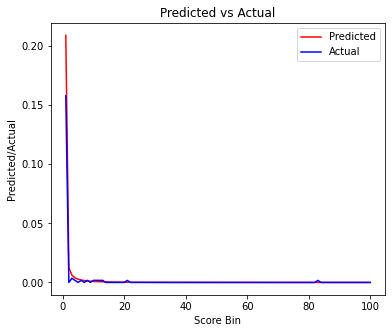

In [72]:
fig, ax=plt.subplots(1, 1, figsize=(6, 5))

ax.plot(y_test_df_sum['score_cut'], y_test_df_sum['y_pred'], label='Predicted', color='red')
ax.plot(y_test_df_sum['score_cut'], y_test_df_sum['y'], label='Actual', color='blue')
ax.set_title('Predicted vs Actual')
ax.legend(loc='upper right')
ax.set_xlabel('Score Bin')
ax.set_ylabel('Predicted/Actual')